### Interactive visualization

In [110]:
using Interact, StatsPlots, DataFrames, CSV, Dates;



# Install WebIO for jupyter notebook
#WebIO.install_jupyter_nbextension() # might need to restart Jupyter afterwards in order for it to work

# Install WebIO for jupyter lab
#WebIO.install_jupyter_labextension() # might need to restart Jupyter afterwards in order for it to work

##### Choose the parameter combination to evaluate in the interactive plot (see results folder)

In [323]:
include("plotting_functions.jl");
@manipulate for case=string.(collect(1:6)),
    start=Date(2015,1,1):Day(1):Date(2015,12,31), 
    show=1:1:8, 
    number_of_peers = 3:1:5,
    pick_peer=string.(collect(1:5))
    
    if parse(Int, pick_peer) > number_of_peers
        error("There are only $(number_of_peers) peers in the market! You picked peer $(parse(Int, pick_peer)).")
    end
    
    Data_df = load_case(parse(Int, case), number_of_peers);
    
    p1=bar_row(bar_PV, Data_df, start, parse(Int, pick_peer), "kWh", 
        "Sinks of PV generation (>0) and battery load (<0)", show);
    p2=bar_row(bar_demand, Data_df, start, parse(Int, pick_peer), "kWh", 
        "Sources of electricity demand fulfillment", show)
    p3=bar_row(bar_heat, Data_df, start, parse(Int, pick_peer), "kWh", 
        "Sources of heat pump demand fulfillment", show);
    p4=bar_row(bar_comfort, Data_df, start, parse(Int, pick_peer), 
        "comfort ranges", "Heat pump states of charge and comfort ranges", show);
    
    energy_use = calc_energy_use(Data_df, number_of_peers);
    self_consumption = calc_self_consumption(Data_df, number_of_peers);
    self_sufficiency = calc_self_sufficiency(Data_df,number_of_peers);
    comfort_violations = calc_comfort_violations(Data_df, number_of_peers); ;
    profit = calc_profit(Data_df, number_of_peers);

    vbox(vskip(1em),
        hbox(pad(0.1em, md"*Peer*"), pad(0.1em, pick_peer),  
            pad(1em, md"*Profit [EUR]:*"), hskip(1em), profit[parse(Int, pick_peer)],
            pad(1em, md"*Energy use  [kWh]:*"), hskip(2em), energy_use[parse(Int, pick_peer)], 
            pad(1em, md"*Self-consumption rate [%]:*"), hskip(1em),self_consumption[parse(Int, pick_peer)],
            pad(1em, md"*Self-sufficiency rate [%]:*"), hskip(1em), self_sufficiency[parse(Int, pick_peer)],
            pad(1em, md"*Comfort violations [#]:*"), hskip(1em), comfort_violations[parse(Int, pick_peer)]),
                        
         vskip(1em),
         md"**OUTPUT:**",
         vskip(1em),
         plot(p1,p2,p3,p4, layout=(4,1), size=(show*275, 4*220)));
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["case"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "1","val" => 1,"id" => "id2LatPkab"), OrderedDict{String,Any}("key" => "2","val" => 2,"id" => "idDboVuZWK"), OrderedDict{String,Any}("key" => "3","val" => 3,"id" => "idNZ86sB5e"), OrderedDict{String,Any}("key" => "4","val" => 4,"id" => "id6lxPwq2C"), OrderedDict{String,Any}("key" => "5","val" => 5,"id" => "idbpQd0RYK"), OrderedDict{String,Any}("key" => "6","val" => 6,"id" => "id9f8LNKF3")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001455ece70, Task (runnable) @0x00000001455ece70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\

In [322]:
#savefig("pics/flows_autumn_case5_prosumager.pdf")

### Visualization: Key performance indicators

In [342]:
p=3;
Data_df = load_case(1, p)
energy_use = calc_energy_use(Data_df, p);
self_consumption = calc_self_consumption(Data_df, p);
self_sufficiency = calc_self_sufficiency(Data_df, p);
comfort_violations = calc_comfort_violations(Data_df, p); ;
profit = calc_profit(Data_df, p);

for c=2:6
    Data_df = load_case(c, p);
    energy_use=hcat(energy_use, calc_energy_use(Data_df, p));
    self_consumption = hcat(self_consumption, calc_self_consumption(Data_df, p));
    self_sufficiency = hcat(self_sufficiency, calc_self_sufficiency(Data_df, p));
    comfort_violations = hcat(comfort_violations, calc_comfort_violations(Data_df, p)); ;
    profit = hcat(profit, calc_profit(Data_df, p));
end

#plot(p1,p2,p3,p4, layout=(4,1), size=(show*250, 4*175)));

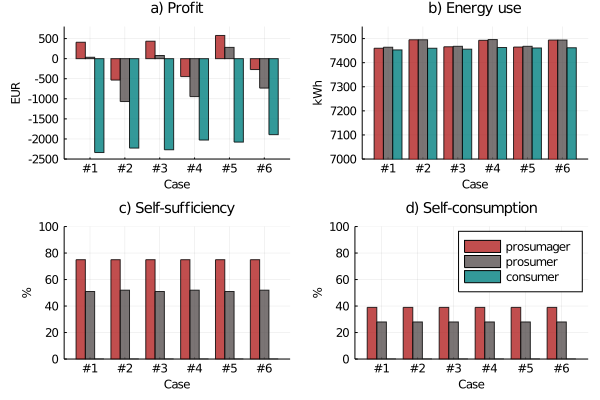

In [347]:
p1 = groupedbar(repeat("#" .* string.(1:6)), profit', title="a) Profit", legend=false,
                color_palette =palette([:firebrick, :teal], 3), alpha=0.8, titlefontsize=10,
                ylim=(-2500,800));
     yaxis!("EUR", font(8, "sans-sarif"), tickfontsize=8)
     xaxis!("Case", font(8, "sans-sarif"), tickfontsize=8)

p2 = groupedbar(repeat("#" .* string.(1:6)), energy_use', title="b) Energy use", legend=false, 
                ylims=(7000, 7550),color_palette =palette([:firebrick, :teal], 3), 
                alpha=0.8, titlefontsize=10);
     yaxis!("kWh", font(8, "sans-sarif"), tickfontsize=8)
     xaxis!("Case", font(8, "sans-sarif"), tickfontsize=8)

p3 = groupedbar(repeat("#" .* string.(1:6)), self_sufficiency', title="c) Self-sufficiency", 
                legend=false, ylims=(0, 100),color_palette =palette([:firebrick, :teal], 3), 
                alpha=0.8, titlefontsize=10);
     yaxis!("%", font(8, "sans-sarif"), tickfontsize=8)
     xaxis!("Case", font(8, "sans-sarif"), tickfontsize=8)

p4 = groupedbar(repeat("#" .* string.(1:6)), self_consumption', title="d) Self-consumption", 
                label=["prosumager" "prosumer" "consumer"], legend=(.65, .85), ylims=(0, 100),
                color_palette =palette([:firebrick, :teal], 3), alpha=0.8, titlefontsize=10);
     yaxis!("%", font(8, "sans-sarif"), tickfontsize=8)
     xaxis!("Case", font(8, "sans-sarif"), tickfontsize=8)

plot(p1,p2,p3,p4, layout=(2,2), size=(4*150, 4*100))

In [348]:
#savefig("pics/KPIs.pdf")

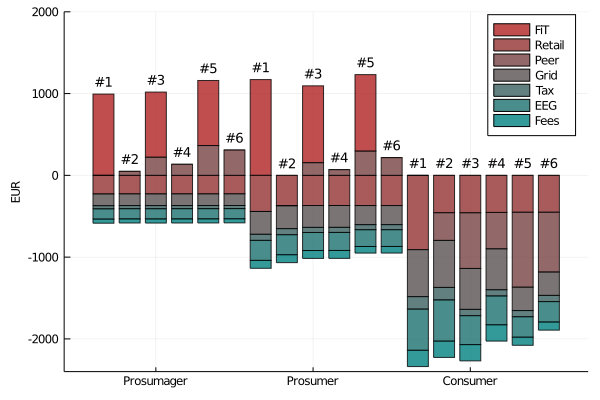

In [354]:
levies1=hcat([calc_levies(i,3) for i in 1:6]...);
levies2=[levies1[:,1:3:end] levies1[:,2:3:end] levies1[:,3:3:end]];
groupedbar(levies2', bar_position = :stack, 
            label=["FiT" "Retail"  "Peer" "Grid" "Tax" "EEG" "Fees"], legend=(.9,.95), 
            xticks=(3:6:18, ["Prosumager" "Prosumer" "Consumer"]),
            ylim=(-2400,2000),color_palette =palette([:firebrick, :teal], 7), alpha=0.8);

annotate!((1:12), levies2'[1:12,1]+levies2'[1:12,3] .+150, [repeat("#" .* string.(1:6))...], Plots.font("Sans", 9))
annotate!((13:18), [150...], [repeat("#" .* string.(1:6))...], Plots.font("Sans", 9))
yaxis!("EUR", font(8, "sans-sarif"), tickfontsize=8)

In [355]:
#savefig("pics/Levies.pdf")

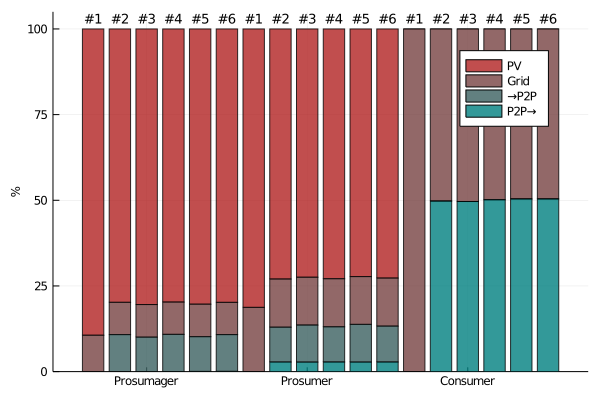

In [365]:
shares=hcat([calc_shares(i,3) for i in 1:6]...);
shares2=[shares[:,1:3:end] shares[:,2:3:end] shares[:,3:3:end]];
shares3=shares2./sum(shares2,dims=1).*100;
groupedbar(shares3', bar_position = :stack, ylim=(0,105),
            label=["PV" "Grid" "→P2P" "P2P→"], legend=(.85,.85), 
            xticks=(3:6:18, ["Prosumager" "Prosumer" "Consumer"]),
            color_palette =palette([:firebrick, :teal], 4), alpha=0.8);
yaxis!("%", font(8, "sans-sarif"), tickfontsize=8)
annotate!((1:18), [100...] .+ 3, [repeat("#" .* string.(1:6))...], Plots.font("Sans", 9))

In [366]:
#savefig("pics/Shares.pdf")